In [ ]:
# Assignment: Perform gradient boosting model to European Social Survey data. 

In [1]:
# Import packages 

import itertools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [2]:
# Use European Social Survey data with a categorical outcome: whether 
# or not someone lives with a partner. 

# Define dataset and drop missing values

df = pd.read_csv(("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna(axis = 0)

# Define outcome and predictors.
# Set the outcomes to '0' and '1'.

y = df["partner"] - 1
X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno"])]

# Make the categorical variable "country" into dummies.
X = pd.concat([X, pd.get_dummies(df["cntry"])], axis = 1)

# Create training and test sets. 
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# Place 20% in the test set. 
X_test, y_test = X[offset:], y[offset:]


In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.tail()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0
8593,SE,3746.0,7,2.0,6.0,7.0,5.0,7.0,7.0,4.0,2.0,15.0,2.0


In [5]:
df.shape

(8147, 13)

In [6]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [7]:
# Add visualizations here  

In [8]:
# There will be 500 iterations, use 2-deep trees, and set the loss function.

# Update this table for the drill at the end of this analysis

params = {"n_estimators": 500,
          "max_depth": 2,
          "loss": "deviance",
          }

# Learning reduces the contribution of each tree; this reduces accuracy, recall and precision.
#


# Initialize and fit the model.

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [9]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion muatrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


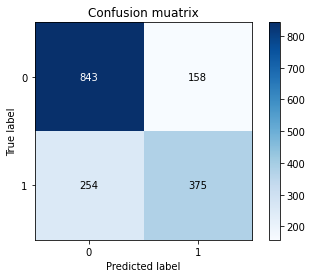

In [10]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1], False)

Normalized confusion matrix


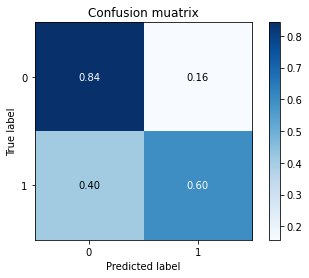

In [11]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1], True)

In [12]:
# Accuracy

clf.score(X_test, y_test)

0.747239263803681

In [13]:
# Precision

y_pred = clf.predict(X_test)
precision_score(y_test, y_pred)

0.7035647279549718

In [14]:
# Recall 

recall_score(y_test, y_pred)

0.5961844197138315

In [15]:
""" 

Original Accuracy: 0.74723 (74%)
Original Precision: 0.70356 (70%)
Original Recall: 0.59618 (59%)

"""

' \n\nOriginal Accuracy: 0.74723 (74%)\nOriginal Precision: 0.70356 (70%)\nOriginal Recall: 0.59618 (59%)\n\n'

Recommendations for tuning parameters include:  

- learning_rate
- max_depth
- n_estimators
- loss
- subsample
- min_samples_split

When this analyst manipulated these parameters individually, minor gains were made (1 - 4%) individually or performance took a hit. 
                                                                                                                               